In [1]:

!nvidia-smi

Fri Apr 26 06:17:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLOv8

In [3]:

# Pip install method (recommended)

!pip install ultralytics==8.2.2

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

# CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model


### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.23M/6.23M [00:00<00:00, 117MB/s]
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 118MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 96.6ms
Speed: 14.5ms preprocess, 96.6ms inference, 3541.0ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


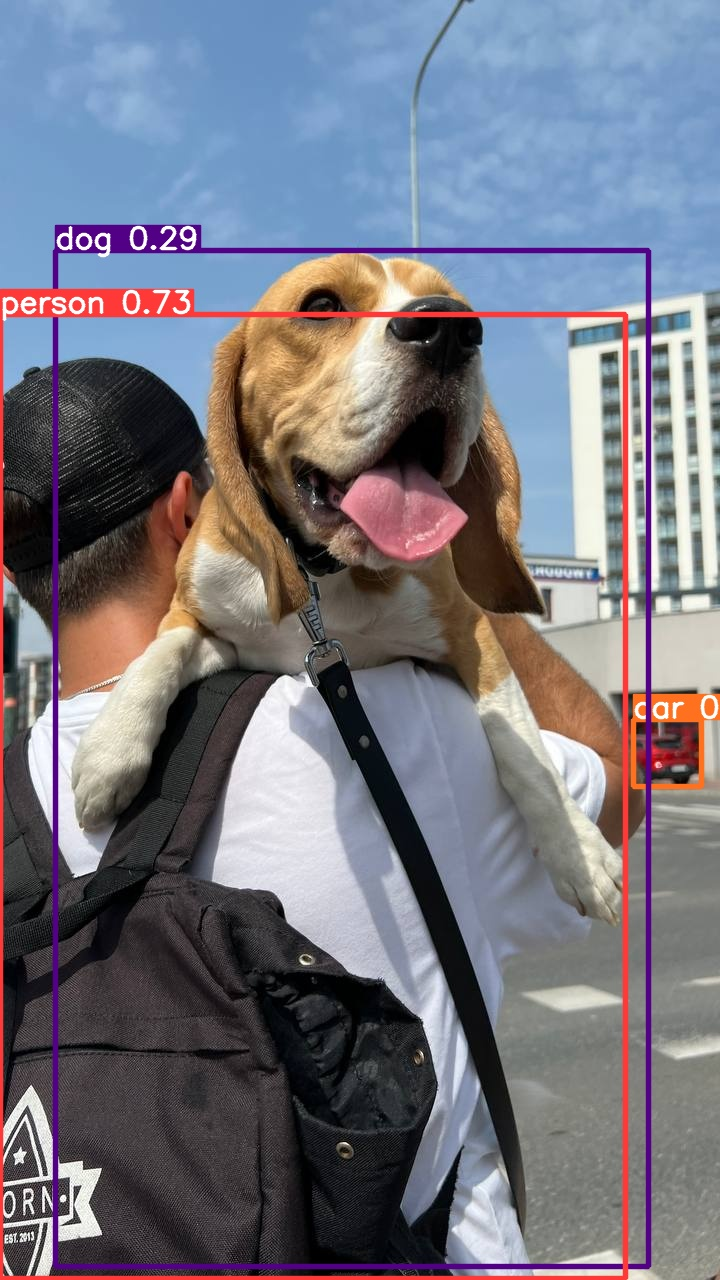

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [7]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 360.2ms
Speed: 8.8ms preprocess, 360.2ms inference, 3255.8ms postprocess per image at shape (1, 3, 640, 384)


In [8]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [9]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [10]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

# Custom Training

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
%cd /content/drive/MyDrive/Shared_With329/object-detection-YOLOv8

/content/drive/.shortcut-targets-by-id/1AGnEnD021zqhXlYqxghamelB1xYWx2Xs/Shared_With329/object-detection-YOLOv8


In [13]:
!ls


data  Object-detection-YOLOv8.ipynb


In [15]:
%cd /content/drive/MyDrive/Shared_With329/object-detection-YOLOv8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/.shortcut-targets-by-id/1AGnEnD021zqhXlYqxghamelB1xYWx2Xs/Shared_With329/object-detection-YOLOv8
100% 21.5M/21.5M [00:00<00:00, 126MB/s]
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

In [16]:

!ls runs/detect/train/

args.yaml					     P_curve.png	 train_batch121.jpg
confusion_matrix_normalized.png			     PR_curve.png	 train_batch122.jpg
confusion_matrix.png				     R_curve.png	 train_batch1.jpg
events.out.tfevents.1714114427.68c34f129ca6.13332.0  results.csv	 train_batch2.jpg
F1_curve.png					     results.png	 val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	 val_batch0_pred.jpg
labels.jpg					     train_batch120.jpg  weights


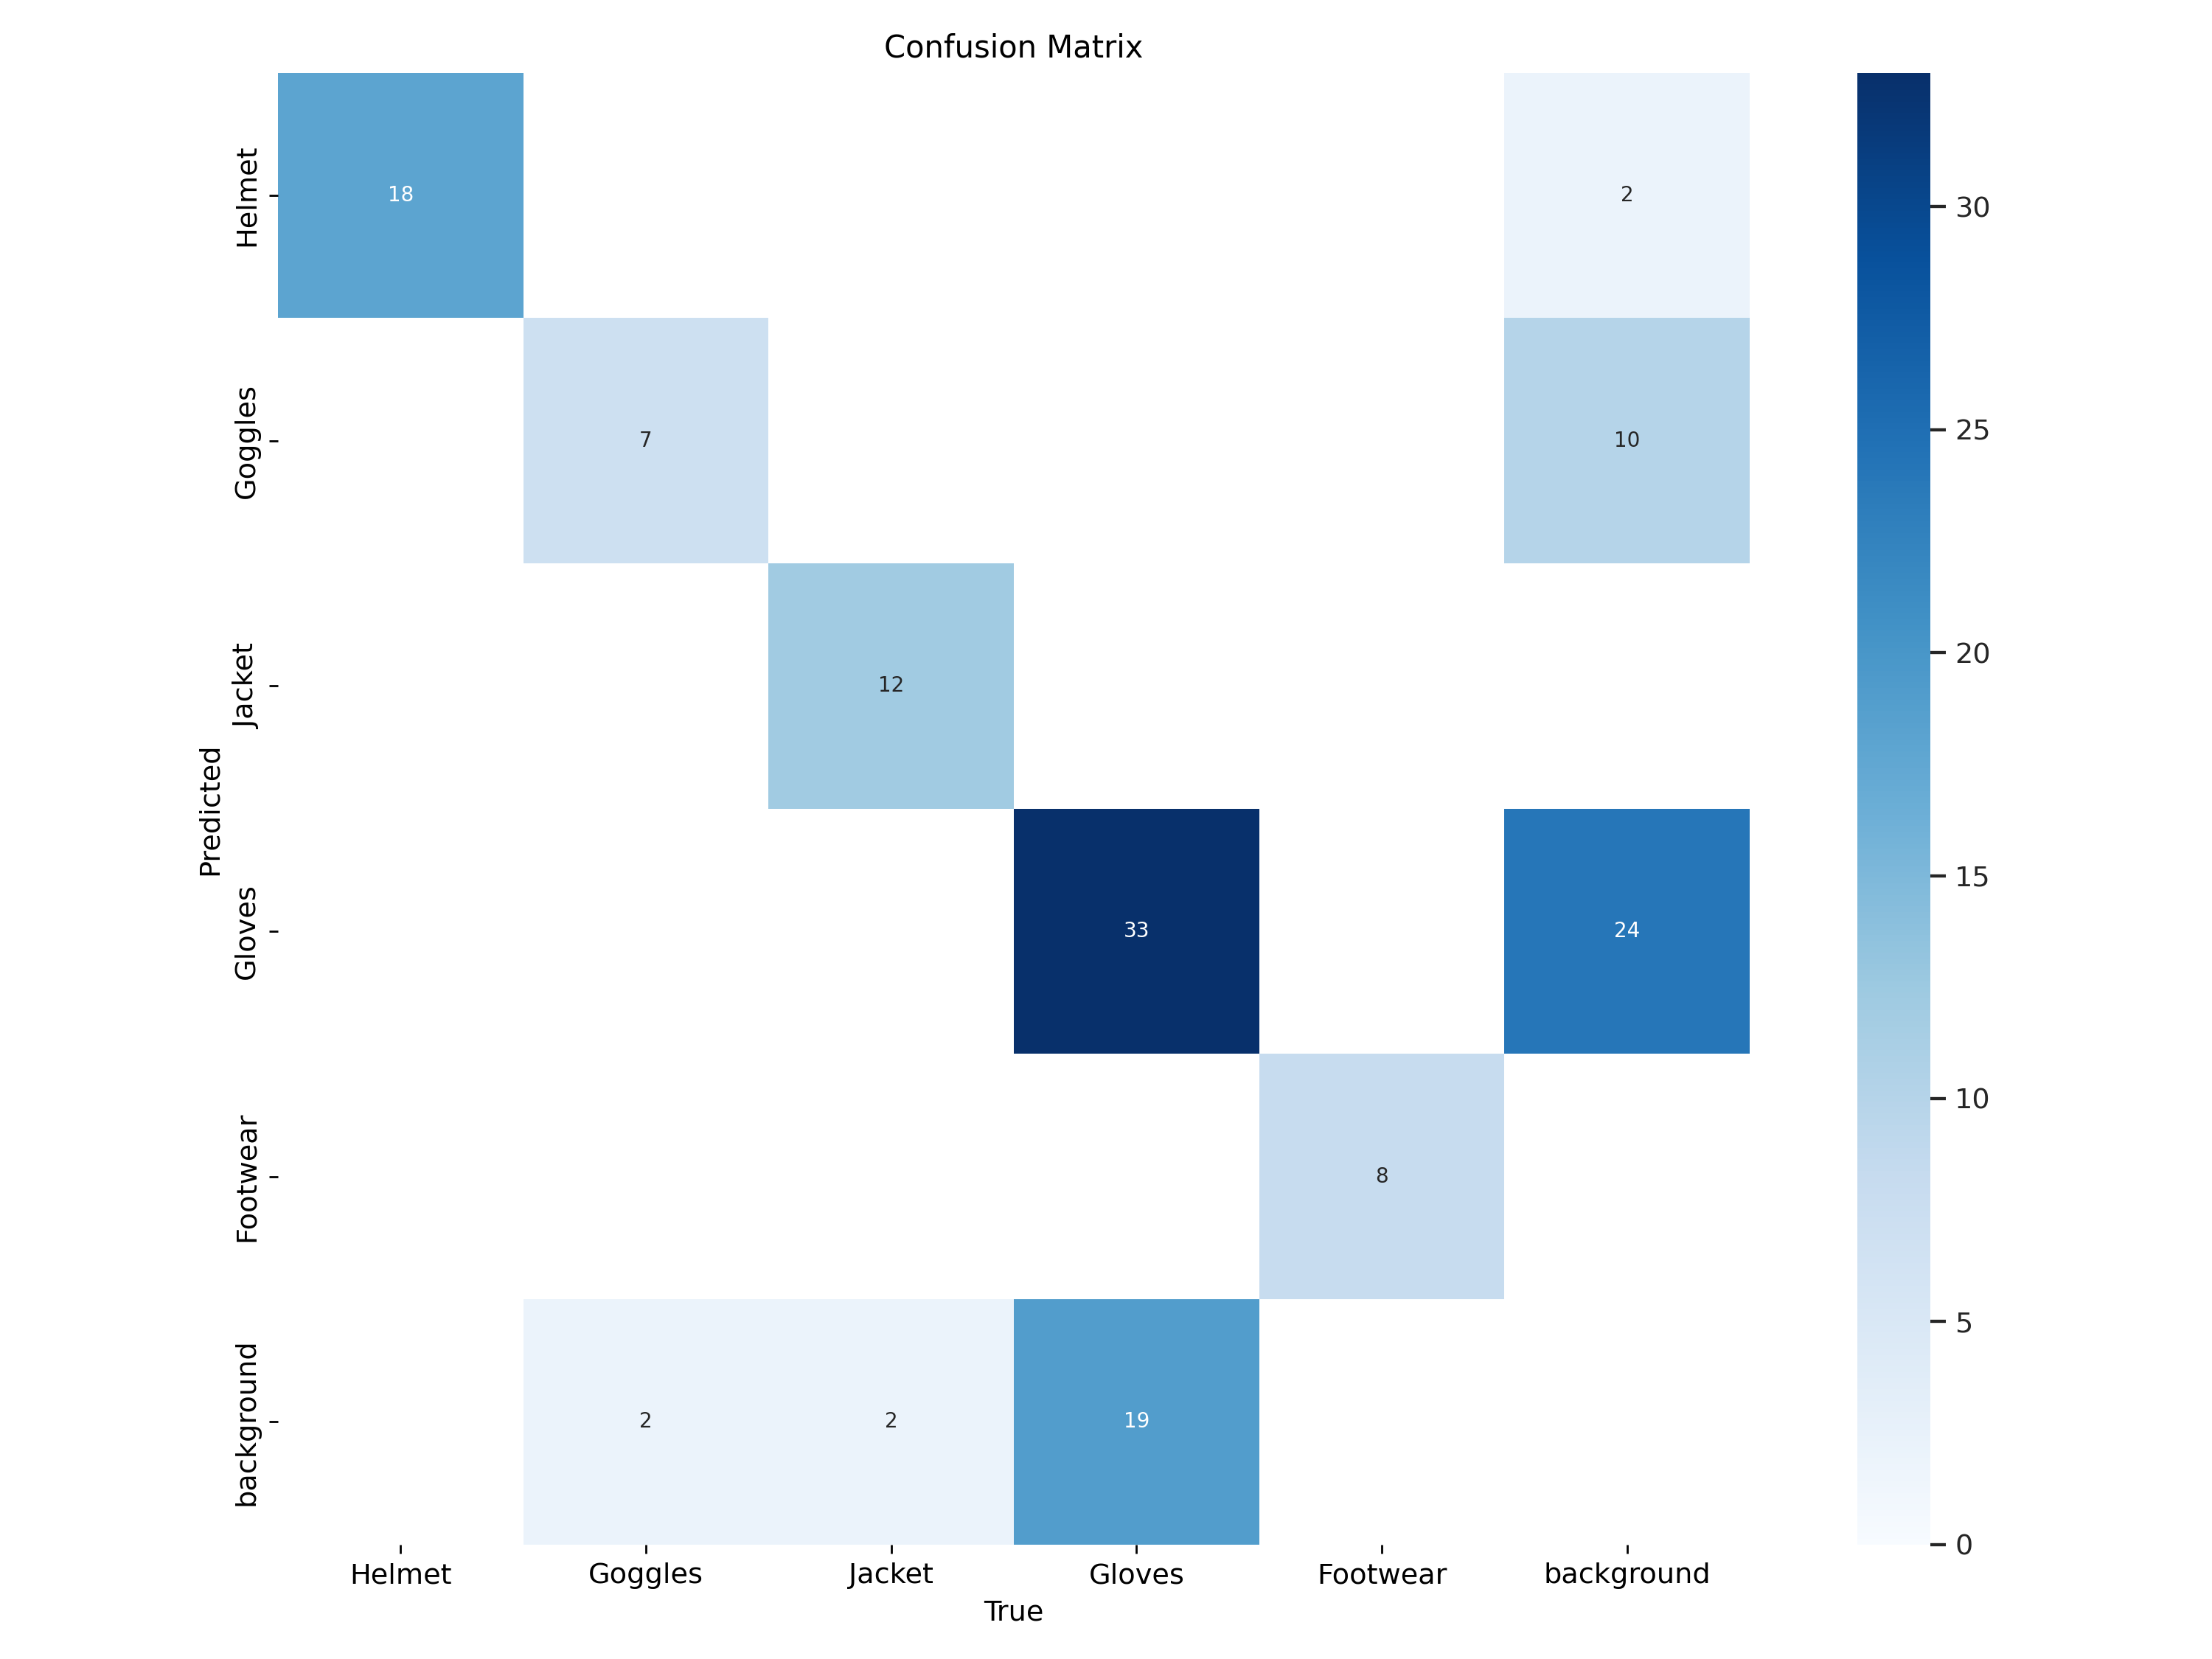

In [18]:

Image(filename='runs/detect/train/confusion_matrix.png', width=600)

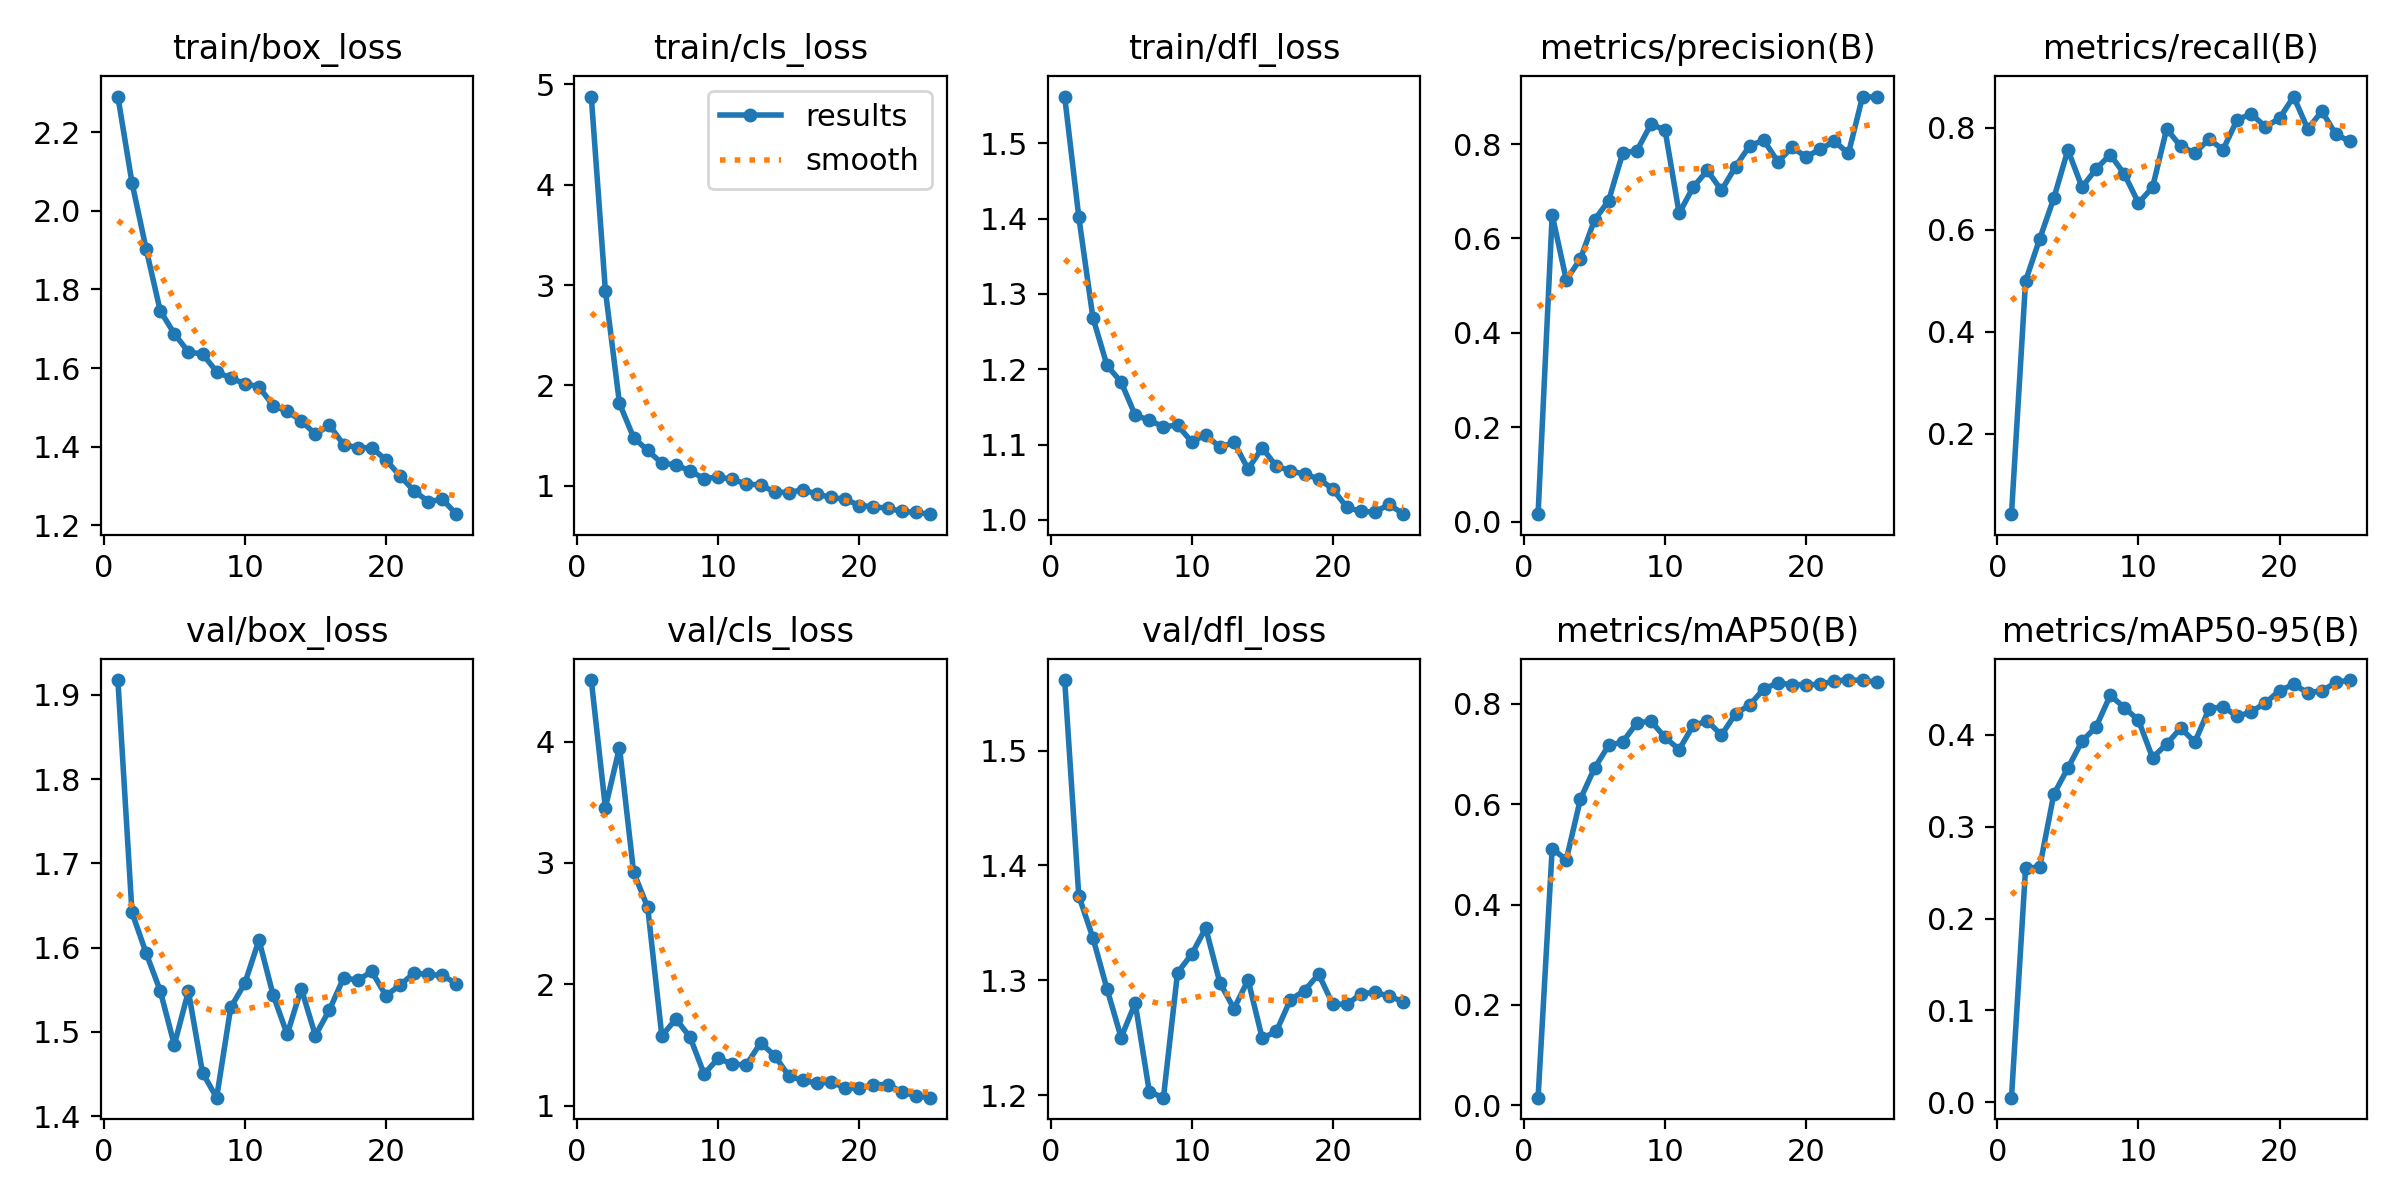

In [20]:
Image(filename='runs/detect/train/results.png', width=600)

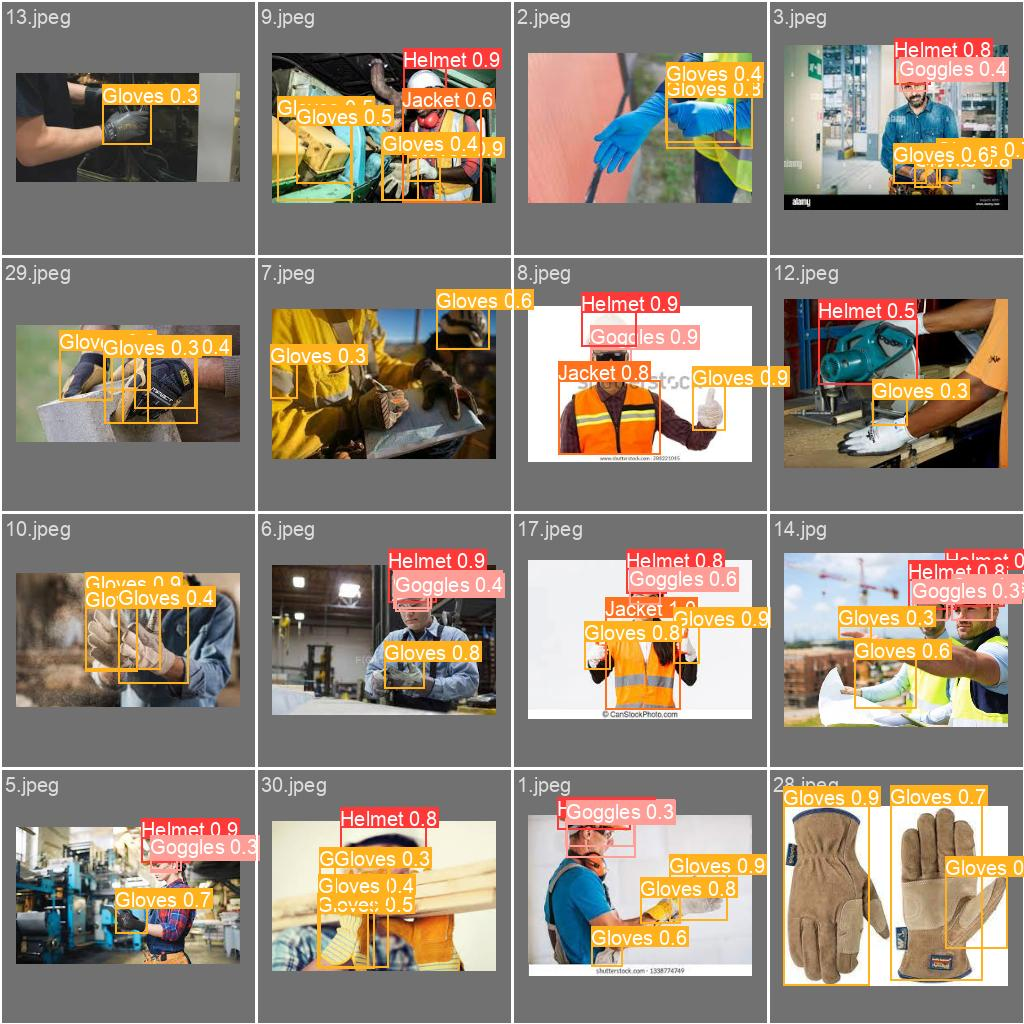

In [21]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Inference with Custom Model

In [22]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /content/drive/.shortcut-targets-by-id/1AGnEnD021zqhXlYqxghamelB1xYWx2Xs/Shared_With329/object-detection-YOLOv8/data/test/images/1.jpeg: 192x224 1 Helmet, 1 Goggles, 3 Glovess, 70.3ms
image 2/31 /content/drive/.shortcut-targets-by-id/1AGnEnD021zqhXlYqxghamelB1xYWx2Xs/Shared_With329/object-detection-YOLOv8/data/test/images/10.jpeg: 160x224 4 Glovess, 73.3ms
image 3/31 /content/drive/.shortcut-targets-by-id/1AGnEnD021zqhXlYqxghamelB1xYWx2Xs/Shared_With329/object-detection-YOLOv8/data/test/images/11.jpeg: 224x224 1 Gloves, 9.0ms
image 4/31 /content/drive/.shortcut-targets-by-id/1AGnEnD021zqhXlYqxghamelB1xYWx2Xs/Shared_With329/object-detection-YOLOv8/data/test/images/12.jpeg: 192x224 1 Helmet, 2 Glovess, 8.9ms
image 5/31 /content/drive/.shortcut-targets-by-id/1AGnEnD021zqhXlYqxghamelB1xYWx2Xs/Shared_With329/object

**NOTE:** Let's take a look at few results.

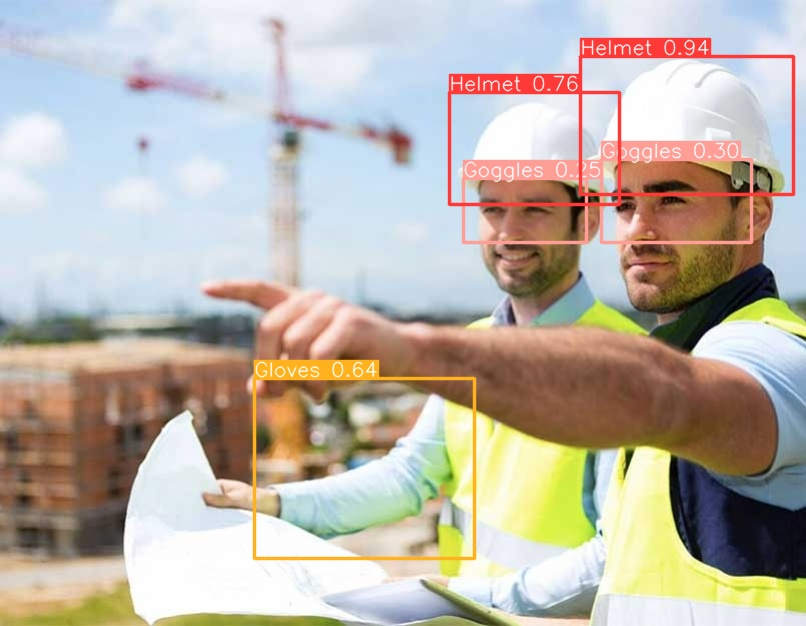

In [23]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")